In [1]:
import numpy as np

In [3]:
def gradient_descent(X, y, alpha=0.01, lambda_=0.1, num_iters=1000):
    m, n = X.shape  
    w = np.zeros((n, 1))  
    y = y.reshape(-1, 1)  

    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    for _ in range(num_iters):
        predictions = np.dot(X, w)
        error = predictions - y 
        gradient = (1/m) * np.dot(X.T, error) + lambda_ * w
        
        w -= alpha * gradient
    
    return w

<li><b><i>Инициализация параметров:</i></b> Вектор весов w изначально инициализируется нулями. Параметры шага обучения <b><i>α</i></b>, коэффициента регуляризации <b><i>λ</i></b>, и числа итераций передаются в качестве аргументов.</li>
<li><b><i>Масштабирование признаков:</i></b> Признаки <b><i>X</i></b> нормализуются, что улучшает сходимость градиентного спуска.</li>
<li><b><i>Градиентный спуск:</i></b> На каждом шаге итерации вычисляется градиент функции потерь, включающий регуляризационный член, и веса обновляются.</li>
<li><b><i>L2-регуляризация:</i></b> Добавление регуляризатора <b><i>λw</i></b> помогает избежать переобучения.</li>

In [11]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([3, 5, 7, 9])  

w = gradient_descent(X, y)
w

array([[1.06479427],
       [1.06479427]])

In [13]:
import pandas as pd

In [15]:
file_path = 'car_price.csv'
car_data = pd.read_csv(file_path)

car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
def gradient_descent(X, y, alpha=0.01, lambda_=0.1, num_iters=1000):
    m, n = X.shape  
    w = np.zeros((n, 1)) 
    y = y.reshape(-1, 1) 

    for _ in range(num_iters):
        predictions = np.dot(X, w)
        error = predictions - y
        gradient = (1/m) * np.dot(X.T, error) + lambda_ * w
        
        w -= alpha * gradient
    
    return w

In [37]:
w = gradient_descent(X_normalized, y, alpha=0.001, lambda_=0.1, num_iters=1000)

w

array([[-1.02987233],
       [ 2.94640185]])

In [39]:
car_data.info()

car_data.describe()

missing_values = car_data.isnull().sum()

missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Series([], dtype: int64)

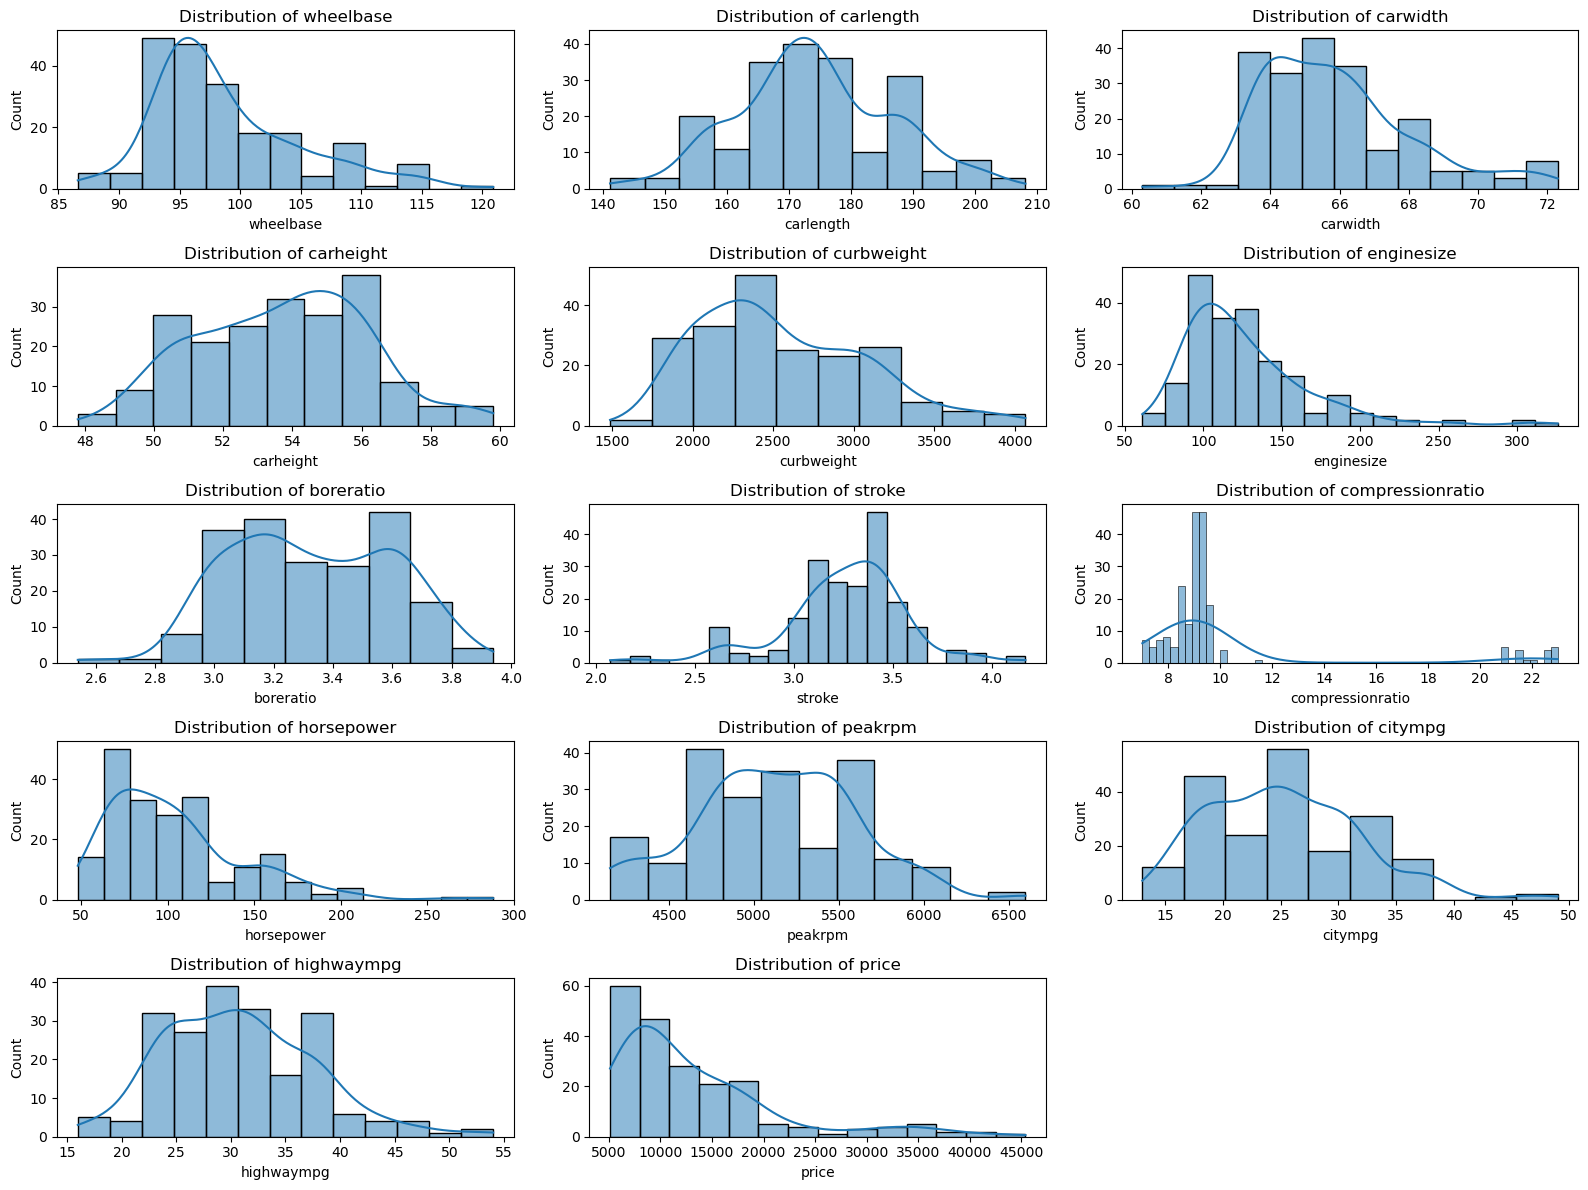

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                  'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                  'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(car_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


<li>Распределения числовых признаков показывают, что данные достаточно сбалансированы, однако некоторые признаки, такие как <b><i>horsepower, enginesize, curbweight,</i></b> и <b><i>price</i></b>, имеют распределения с длинными хвостами, что может указывать на наличие выбросов.</li>

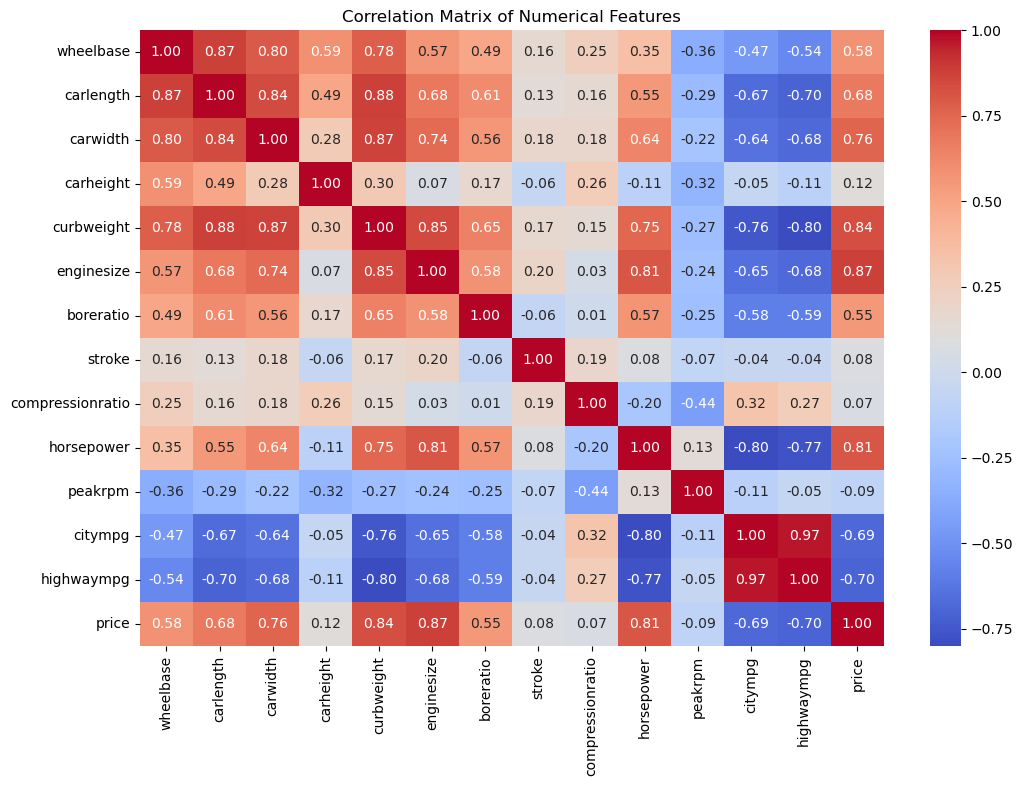

In [45]:
plt.figure(figsize=(12, 8))
corr_matrix = car_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<b><i>Корреляционная матрица</i></b> показала сильные корреляции между целевым признаком price и признаками:
<li><b><i>enginesize (0.87),</i></b></li>
<li><b><i>curbweight (0.83),</i></b></li>
<li><b><i>horsepower (0.81).</i></b></li>
Эти признаки могут быть ключевыми для предсказания цены автомобиля.

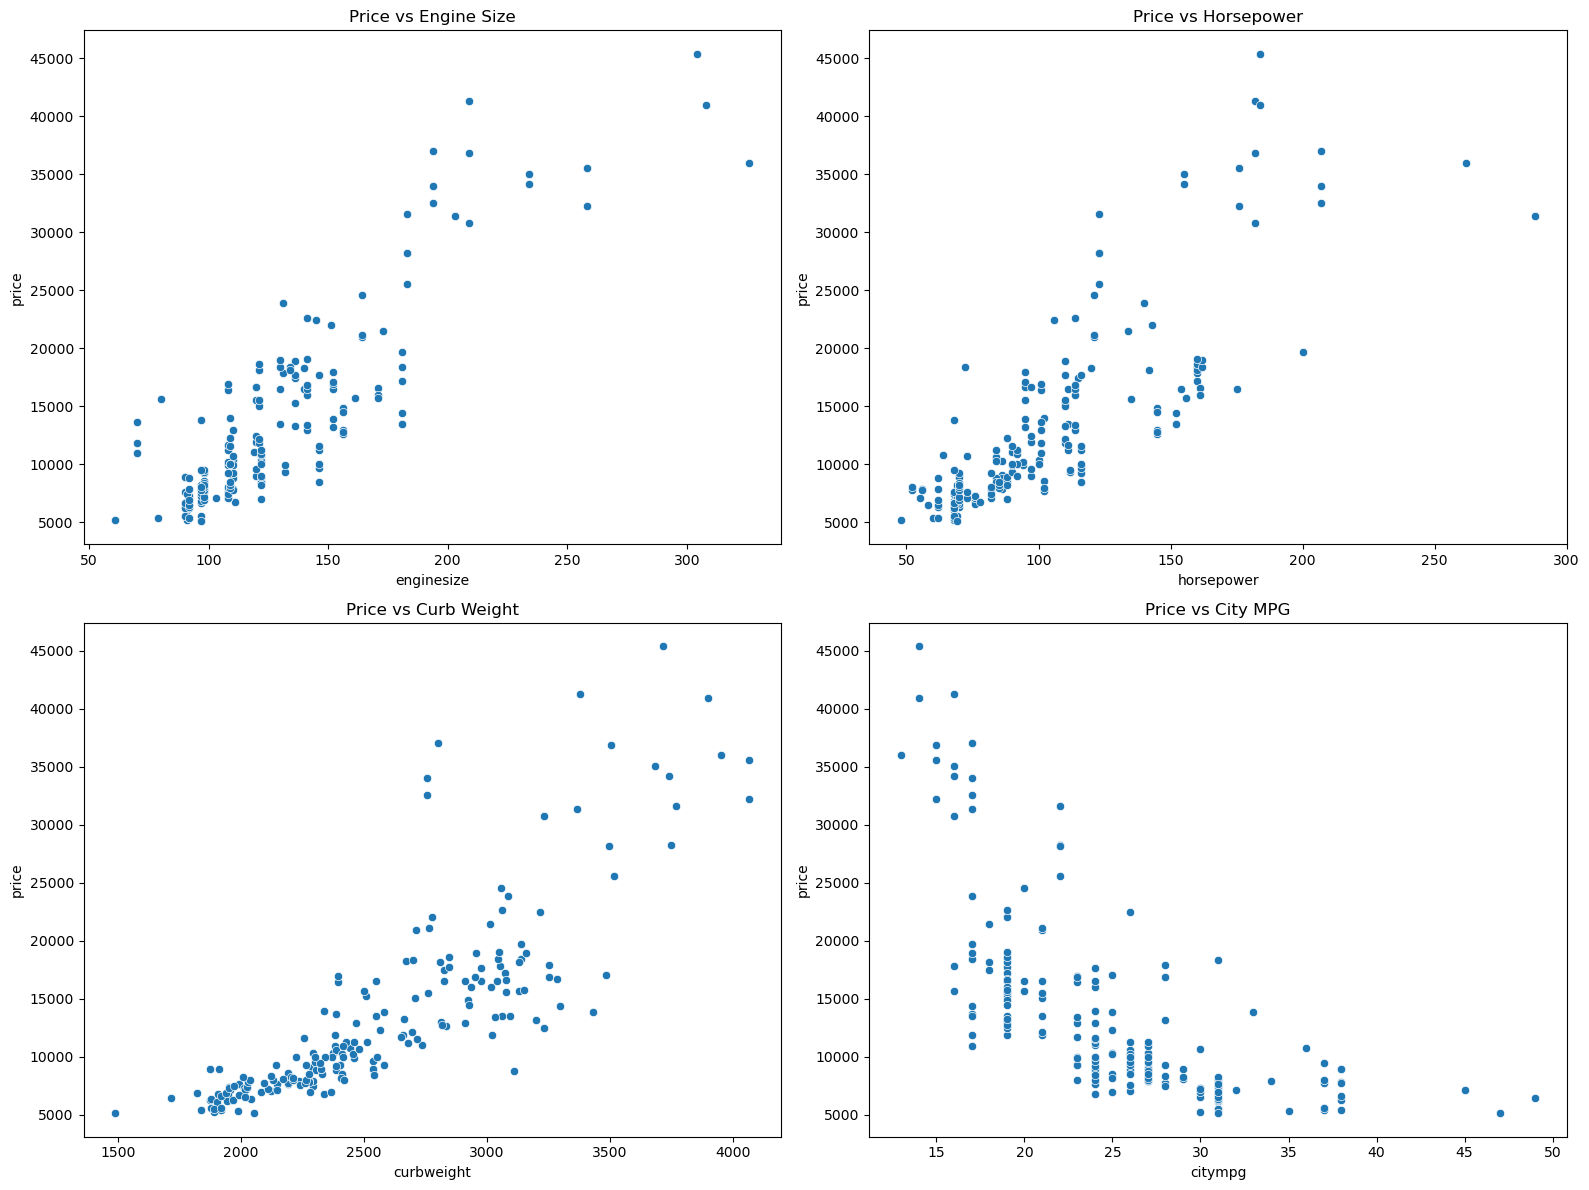

In [47]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='enginesize', y='price', data=car_data)
plt.title('Price vs Engine Size')

plt.subplot(2, 2, 2)
sns.scatterplot(x='horsepower', y='price', data=car_data)
plt.title('Price vs Horsepower')

plt.subplot(2, 2, 3)
sns.scatterplot(x='curbweight', y='price', data=car_data)
plt.title('Price vs Curb Weight')

plt.subplot(2, 2, 4)
sns.scatterplot(x='citympg', y='price', data=car_data)
plt.title('Price vs City MPG')

plt.tight_layout()
plt.show()

<b><i>Scatter plots</i></b> визуализировали линейные зависимости между ценой и наиболее значимыми признаками:

<li>Зависимость между <b><i>enginesize</i></b> и <b><i>price</i></b> практически линейная, что делает этот признак очень важным для линейной модели.</li>
<li><b><i>horsepower</i></b> и <b><i>curbweight</i></b> также имеют положительные корреляции с ценой.</li>
<li>Зависимость <b><i>citympg</i></b> и <b><i>price</i></b> более слабая и отрицательная, что может усложнить использование этого признака для точного предсказания.</li>

In [52]:
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

car_data_encoded = pd.get_dummies(car_data, columns=categorical_cols, drop_first=True)

car_data_cleaned = car_data_encoded.drop(columns=['CarName', 'car_ID'])

car_data_cleaned.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


Категориальные признаки были преобразованы в количественные с помощью <b><i>one-hot encoding</i></b>, а ненужные столбцы <b><i>CarName</i></b> и <b><i>car_ID</i></b> были удалены.

In [55]:
from sklearn.model_selection import train_test_split

X = car_data_cleaned.drop('price', axis=1)
y = car_data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 43), (41, 43), (164,), (41,))

Данные успешно разделены на обучающую и тестовую выборки. Обучающая выборка содержит 164 примера, а тестовая — 41.

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

w = gradient_descent(X_train_scaled, y_train.to_numpy(), alpha=0.01, lambda_=0.1, num_iters=1000)

def predict(X, w):
    return np.dot(X, w)

y_train_pred = predict(X_train_scaled, w)
y_test_pred = predict(X_test_scaled, w)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse, train_rmse, train_r2, test_mse, test_rmse, test_r2

(179487158.95324516,
 13397.281774794661,
 -2.009618839655707,
 200565823.06226444,
 14162.126360905853,
 -1.5406081528075082)

Обучающая выборка:
<li><b><i>MSE: 179487158.95</i></b></li>
<li><b><i>RMSE: 13397.28</i></b></li>
<li><b><i>𝑅^2: -2.01</i></b> (отрицательное значение указывает на плохое качество модели)</li>
<br>
Тестовая выборка:
<li><b><i>MSE: 200565823.06</i></b></li>
<li><b><i>RMSE: 14162.13</i></b></li>
<li><b><i>𝑅^2: -1.54</i></b> (отрицательное значение также свидетельствует о низкой предсказательной способности)</li>

In [63]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

train_rmse_ridge = np.sqrt(train_mse_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)

train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

train_mse_ridge, train_rmse_ridge, train_r2_ridge, test_mse_ridge, test_rmse_ridge, test_r2_ridge

(3123170.9861996914,
 1767.2495540244709,
 0.9476310489599917,
 8537726.078789992,
 2921.9387534289613,
 0.8918508839091829)

Обучающая выборка:

<li><b><i>MSE: 3123170.99</i></b></li>
<li><b><i>RMSE: 1767.25</i></b></li>
<li><b><i>𝑅^2: 0.95</i></b> (очень хорошее качество модели)</li>
<br>
Тестовая выборка:
<li><b><i>MSE: 8537726.08</i></b></li>
<li><b><i>RMSE: 2921.94</i></b></li>
<li><b><i>𝑅^2: 0.89</i></b> (хорошее качество предсказаний)</li>

Сравнение:
<li>Модель, реализованная с использованием градиентного спуска, показала значительно худшие результаты (отрицательные <b><i>𝑅^2</i></b> и гораздо более высокие <b><i>MSE</i></b> и <b><i>RMSE</i></b>).</li>
<li>Модель <b><i>Ridge</i></b>-регрессии из библиотеки <b><i>sklearn</i></b> обеспечивает существенно более точные предсказания, как на обучающей, так и на тестовой выборках.</li>

In [69]:
from sklearn.model_selection import cross_val_score

ridge_model_cv = Ridge(alpha=0.1)

cv_scores = cross_val_score(ridge_model_cv, X_train_scaled, y_train, cv=5, scoring='r2')

mse_scores = cross_val_score(ridge_model_cv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

mean_r2_cv = np.mean(cv_scores)
mean_mse_cv = -np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)

mean_r2_cv, mean_mse_cv, mean_rmse_cv

(0.8411718724928805, 9563553.061064925, 3092.4994844081907)

Результаты кросс-валидации для модели <b><i>Ridge</i></b>-регрессии (5-кратная кросс-валидация):

<li><b><i>Средний 𝑅^2: 0.84</i></b> (хорошая предсказательная способность)</li>
<li><b><i>Средний MSE: 9563553.06</i></b></li>
<li><b><i>Средний RMSE: 3092.50</i></b></li>

In [87]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_train_list = []
mse_test_list = []
rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []

for train_index, test_index in kf.split(X_train_scaled):
    X_fold_train, X_fold_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    ridge_model_cv.fit(X_fold_train, y_fold_train)
    
    y_train_pred_fold = ridge_model_cv.predict(X_fold_train)
    y_test_pred_fold = ridge_model_cv.predict(X_fold_test)
    
    mse_train_list.append(mean_squared_error(y_fold_train, y_train_pred_fold))
    mse_test_list.append(mean_squared_error(y_fold_test, y_test_pred_fold))
    rmse_train_list.append(np.sqrt(mse_train_list[-1]))
    rmse_test_list.append(np.sqrt(mse_test_list[-1]))
    r2_train_list.append(r2_score(y_fold_train, y_train_pred_fold))
    r2_test_list.append(r2_score(y_fold_test, y_test_pred_fold))

metrics_data = {
    'MSE-Train': mse_train_list,
    'MSE-Test': mse_test_list,
    'RMSE-Train': rmse_train_list,
    'RMSE-Test': rmse_test_list,
    'R2-Train': r2_train_list,
    'R2-Test': r2_test_list
}

metrics_df = pd.DataFrame(metrics_data)

metrics_df['E'] = metrics_df.mean(axis=1)
metrics_df['STD'] = metrics_df.std(axis=1)

metrics_df.T


,0,1,2,3,4
MSE-Train,2.640990e+06,2.809885e+06,2.284599e+06,3.227880e+06,2.628296e+06
MSE-Test,9.027929e+06,7.559163e+06,1.409718e+07,6.537740e+06,1.632626e+07
RMSE-Train,1.625112e+03,1.676271e+03,1.511489e+03,1.796630e+03,1.621202e+03
RMSE-Test,3.004651e+03,2.749393e+03,3.754621e+03,2.556900e+03,4.040577e+03
R2-Train,9.580130e-01,9.517267e-01,9.601519e-01,9.477137e-01,9.542751e-01
R2-Test,7.906008e-01,8.825813e-01,7.859966e-01,8.655422e-01,7.590693e-01
E,1.945592e+06,1.728913e+06,2.731175e+06,1.628329e+06,3.160036e+06
STD,3.310750e+06,2.801832e+06,5.150955e+06,2.491737e+06,5.965731e+06


Обучающая выборка:

<li>Модель показывает стабильные результаты на всех фолдах с низким стандартным отклонением по метрикам <b><i>MSE, RMSE</i></b> и <b><i>𝑅^2</i></b>. Это свидетельствует о том, что модель хорошо обучается на каждом фолде.</li>
<br>
Тестовая выборка:
<br>
<li>Наблюдается большее разброс значений метрик, что может указывать на наличие вариативности в данных, влияющей на обобщающую способность модели.</li>
<li>Стандартное отклонение для <b><i>MSE</i></b> и <b><i>RMSE</i></b> на тестовых данных выше, что также говорит о возможной изменчивости точности предсказаний в зависимости от фолда.</li>

In [92]:
from sklearn.feature_selection import RFE

ridge_model_rfe = Ridge(alpha=0.1)

rfe_selector = RFE(estimator=ridge_model_rfe, n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_train_scaled, y_train)

selected_features_mask = rfe_selector.support_
selected_features_names = X_train.columns[selected_features_mask]

selected_features_names

Index(['carwidth', 'curbweight', 'enginesize', 'stroke', 'enginelocation_rear',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six'],
      dtype='object')

Используем выбранные признаки для обучения модели Ridge:
<li><b><i>carwidth, curbweight, enginesize, stroke, enginelocation_rear,
       enginetype_ohc, enginetype_ohcv, cylindernumber_five,
       cylindernumber_four, cylindernumber_six</i></b></li>

In [94]:
# Используем выбранные признаки для обучения модели Ridge
X_train_selected = X_train_scaled[:, selected_features_mask]
X_test_selected = X_test_scaled[:, selected_features_mask]

# Обучение модели Ridge с выбранными признаками
ridge_model_selected = Ridge(alpha=0.1)
ridge_model_selected.fit(X_train_selected, y_train)

y_train_pred_selected = ridge_model_selected.predict(X_train_selected)
y_test_pred_selected = ridge_model_selected.predict(X_test_selected)

train_mse_selected = mean_squared_error(y_train, y_train_pred_selected)
test_mse_selected = mean_squared_error(y_test, y_test_pred_selected)

train_rmse_selected = np.sqrt(train_mse_selected)
test_rmse_selected = np.sqrt(test_mse_selected)

train_r2_selected = r2_score(y_train, y_train_pred_selected)
test_r2_selected = r2_score(y_test, y_test_pred_selected)

train_mse_selected, train_rmse_selected, train_r2_selected, test_mse_selected, test_rmse_selected, test_r2_selected


(5477481.175648711,
 2340.4019260906257,
 0.9081542621977426,
 9415171.326594643,
 3068.4151164069444,
 0.8807361061460609)

Использование <b><i>RFE</i></b> для выбора наилучшего подмножества признаков дало сравнимые результаты с предыдущим обучением полной модели. Модель с 10 выбранными признаками по-прежнему показывает хорошее качество на обучающей и тестовой выборках, сохраняя высокое значение <b><i>𝑅^2</i></b>, что свидетельствует о сильной предсказательной способности модели. 
<br>
Обучающая выборка:
<li><b><i>MSE: 5477481.18</i></b></li>
<li><b><i>RMSE: 2340.40</i></b></li>
<li><b><i>𝑅^2: 0.91</i></b></li>
<br>
Тестовая выборка:

<li><b><i>MSE: 9415171.33</i></b></li>
<li><b><i>RMSE: 3068.42</i></b></li>
<li><b><i>𝑅^2: 0.88</i></b></li>

In [101]:
from sklearn.model_selection import GridSearchCV

# Гиперпараметры для Ridge-регрессии
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Коэффициент регуляризации
}

# GridSearchCV для Ridge-регрессии
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Лучшие параметры для Ridge-регрессии
best_ridge_params = ridge_grid.best_params_
best_ridge_mse = -ridge_grid.best_score_

# Теперь добавим RFE и подберем оптимальное количество признаков для RFE
rfe_params = {
    'n_features_to_select': list(range(5, 15)),  # Количество отбираемых признаков
}

# GridSearchCV для RFE с использованием модели Ridge в качестве базовой модели
rfe_model = RFE(estimator=Ridge(alpha=best_ridge_params['alpha']))
rfe_grid = GridSearchCV(rfe_model, rfe_params, cv=5, scoring='neg_mean_squared_error')
rfe_grid.fit(X_train_scaled, y_train)

# Лучшие параметры для RFE
best_rfe_params = rfe_grid.best_params_
best_rfe_mse = -rfe_grid.best_score_

# Выводим лучшие параметры и MSE для обеих моделей
best_ridge_params, best_ridge_mse, best_rfe_params, best_rfe_mse


({'alpha': 10},
 7255896.9857403785,
 {'n_features_to_select': 13},
 7456799.555520406)

In [112]:
# Обучение окончательной модели Ridge-регрессии с оптимальным alpha
ridge_model_final = Ridge(alpha=best_ridge_params['alpha'])
ridge_model_final.fit(X_train_scaled, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred_final_ridge = ridge_model_final.predict(X_train_scaled)
y_test_pred_final_ridge = ridge_model_final.predict(X_test_scaled)

# Оценка качества модели Ridge-регрессии: MSE, RMSE, R^2
train_mse_final_ridge = mean_squared_error(y_train, y_train_pred_final_ridge)
test_mse_final_ridge = mean_squared_error(y_test, y_test_pred_final_ridge)

train_rmse_final_ridge = np.sqrt(train_mse_final_ridge)
test_rmse_final_ridge = np.sqrt(test_mse_final_ridge)

train_r2_final_ridge = r2_score(y_train, y_train_pred_final_ridge)
test_r2_final_ridge = r2_score(y_test, y_test_pred_final_ridge)

# Обучение окончательной модели RFE с оптимальным количеством признаков
rfe_final = RFE(estimator=Ridge(alpha=best_ridge_params['alpha']), n_features_to_select=best_rfe_params['n_features_to_select'])
rfe_final.fit(X_train_scaled, y_train)

# Предсказания на обучающей и тестовой выборках с RFE
y_train_pred_final_rfe = rfe_final.predict(X_train_scaled)
y_test_pred_final_rfe = rfe_final.predict(X_test_scaled)

# Оценка качества модели RFE: MSE, RMSE, R^2
train_mse_final_rfe = mean_squared_error(y_train, y_train_pred_final_rfe)
test_mse_final_rfe = mean_squared_error(y_test, y_test_pred_final_rfe)

train_rmse_final_rfe = np.sqrt(train_mse_final_rfe)
test_rmse_final_rfe = np.sqrt(test_mse_final_rfe)

train_r2_final_rfe = r2_score(y_train, y_train_pred_final_rfe)
test_r2_final_rfe = r2_score(y_test, y_test_pred_final_rfe)

(train_mse_final_ridge, test_mse_final_ridge, train_rmse_final_ridge, test_rmse_final_ridge, train_r2_final_ridge, test_r2_final_ridge,
 train_mse_final_rfe, test_mse_final_rfe, train_rmse_final_rfe, test_rmse_final_rfe, train_r2_final_rfe, test_r2_final_rfe)

(3889352.5972603583,
 11410334.05020534,
 1972.144162392891,
 3377.9185973325853,
 0.9347838089418542,
 0.8554629733441211,
 5299676.266144267,
 13554730.351635369,
 2302.102575070074,
 3681.674938344689,
 0.9111356732833527,
 0.8282994684005491)

Ridge-регрессия с оптимальным значением <b><i>α=10</i></b>:
<br>
Обучающая выборка:
<li><b><i>MSE: 3889352.60</i></b></li>
<li><b><i>RMSE: 1972.14</i></b></li>
<li><b><i>𝑅^2: 0.93</i></b></li>
<br>
Тестовая выборка:
<li><b><i>MSE: 11410334.05</i></b></li>
<li><b><i>RMSE: 3377.92</i></b></li>
<li><b><i>𝑅^2: 0.86</i></b></li>

Модель с <b><i>RFE</i></b> (13 выбранных признаков):
<br>
Обучающая выборка:
<li><b><i>MSE: 5299676.27</i></b></li>
<li><b><i>RMSE: 2302.10</i></b></li>
<li><b><i>𝑅^2: 0.91</i></b></li>
<br>
Тестовая выборка:
<li><b><i>MSE: 13554730.35</i></b></li>
<li><b><i>RMSE: 3681.67</i></b></li>
<li><b><i>𝑅^2: 0.83</i></b></li>

Выводы:
<li>Модель <b><i>Ridge</i></b>-регрессии показывает лучшее качество на обеих выборках по сравнению с моделью <b><i>RFE</i></b>.</li>
<li>Окончательные модели демонстрируют хорошую обобщающую способность, хотя <b><i>RFE</i></b> с меньшим числом признаков чуть уступает полной модели <b><i>Ridge</i></b>-регрессии.</li>

In [114]:
def stochastic_gradient_descent(X, y, alpha=0.01, lambda_=0.1, num_iters=1000):
    m, n = X.shape  
    w = np.zeros((n, 1))  
    y = y.reshape(-1, 1)  

    for _ in range(num_iters):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index, :].reshape(1, -1)
            y_i = y[random_index].reshape(1, -1)
            prediction = np.dot(X_i, w)
            error = prediction - y_i
            gradient = X_i.T @ error + lambda_ * w  
            w -= alpha * gradient 

    return w

w_sgd = stochastic_gradient_descent(X_train_scaled, y_train.to_numpy(), alpha=0.01, lambda_=0.1, num_iters=1000)

y_train_pred_sgd = predict(X_train_scaled, w_sgd)
y_test_pred_sgd = predict(X_test_scaled, w_sgd)

train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)

train_rmse_sgd = np.sqrt(train_mse_sgd)
test_rmse_sgd = np.sqrt(test_mse_sgd)

train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

(train_mse_sgd, test_mse_sgd, train_rmse_sgd, test_rmse_sgd, train_r2_sgd, test_r2_sgd)


(415937852.6174729,
 498761588.4117483,
 20394.55448440767,
 22332.970881898993,
 -5.974395297490735,
 -5.317914679973811)

In [116]:
def mini_batch_gradient_descent(X, y, alpha=0.01, lambda_=0.1, num_iters=1000, batch_size=32):
    m, n = X.shape  
    w = np.zeros((n, 1))  
    y = y.reshape(-1, 1)  

    for _ in range(num_iters):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]
            predictions = np.dot(X_i, w)
            error = predictions - y_i
            gradient = (X_i.T @ error) / batch_size + lambda_ * w  
            w -= alpha * gradient 

    return w

w_mini_batch = mini_batch_gradient_descent(X_train_scaled, y_train.to_numpy(), alpha=0.01, lambda_=0.1, num_iters=1000, batch_size=32)

y_train_pred_mini_batch = predict(X_train_scaled, w_mini_batch)
y_test_pred_mini_batch = predict(X_test_scaled, w_mini_batch)

train_mse_mini_batch = mean_squared_error(y_train, y_train_pred_mini_batch)
test_mse_mini_batch = mean_squared_error(y_test, y_test_pred_mini_batch)

train_rmse_mini_batch = np.sqrt(train_mse_mini_batch)
test_rmse_mini_batch = np.sqrt(test_mse_mini_batch)

train_r2_mini_batch = r2_score(y_train, y_train_pred_mini_batch)
test_r2_mini_batch = r2_score(y_test, y_test_pred_mini_batch)

(train_mse_mini_batch, test_mse_mini_batch, train_rmse_mini_batch, test_rmse_mini_batch, train_r2_mini_batch, test_r2_mini_batch)


(179394474.39102307,
 199393113.94378805,
 13393.82224725351,
 14120.662659513826,
 -2.008064716195089,
 -1.525753207424576)